In [1]:
import torch
from fastai.vision import *

In [2]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [3]:
np.random.seed(42)
src = (ImageList
        .from_csv('../../data/', 'labels.csv', delimiter=';', folder='lfw.mini.list.out', suffix='.png')
        .split_from_df(col=2)
        .label_from_df(label_delim=' '))

In [4]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

In [5]:
data.c

128

In [6]:
arch = models.resnet50

In [7]:
acc_02 = partial(accuracy_thresh, thresh=0.5)
f_score = partial(fbeta, thresh=0.5)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


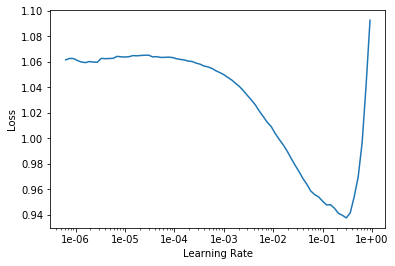

In [8]:
learn.lr_find()
learn.recorder.plot()

In [8]:
lr = 0.05

In [9]:
learn.fit(10, slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.869379,0.792727,0.535072,0.524509,00:04
1,0.745275,0.751183,0.547067,0.543245,00:03
2,0.660941,0.727976,0.557067,0.553159,00:03
3,0.600191,0.701646,0.569087,0.571376,00:03
4,0.554295,0.677901,0.581611,0.577553,00:03
5,0.517426,0.704610,0.581851,0.577706,00:03
6,0.483069,0.659880,0.603510,0.607009,00:03
7,0.460091,0.674883,0.601274,0.607964,00:03
8,0.442937,0.676483,0.604952,0.604722,00:03
9,0.432850,0.654961,0.612740,0.608050,00:03


In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


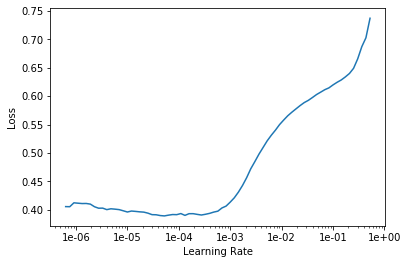

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit(10, slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.395081,0.633049,0.624736,0.623832,00:04
1,0.391739,0.629333,0.627740,0.629577,00:04
2,0.387148,0.628483,0.627885,0.629855,00:04
3,0.387192,0.627234,0.628438,0.630086,00:04
4,0.386491,0.625682,0.630697,0.631180,00:04
5,0.383185,0.627501,0.630096,0.630922,00:04
6,0.385107,0.625911,0.630889,0.631295,00:04
7,0.383372,0.625666,0.630577,0.635014,00:04
8,0.384723,0.625110,0.631851,0.633325,00:04
9,0.381034,0.623733,0.631058,0.632251,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


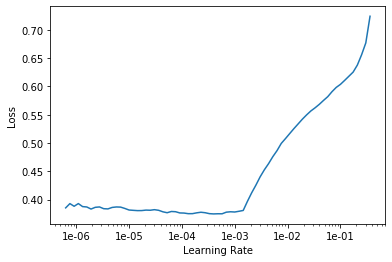

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit(20, slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.382198,0.642373,0.635361,0.640401,00:04
1,0.389168,0.650596,0.631274,0.626726,00:04
2,0.399651,1.171946,0.541394,0.594829,00:04
3,0.422364,0.667381,0.608630,0.626096,00:04
4,0.415076,0.633804,0.622716,0.627049,00:04
5,0.405326,0.625328,0.627500,0.630125,00:04
6,0.397256,1.482684,0.541659,0.574332,00:04
7,0.435864,0.704711,0.586346,0.584604,00:04
8,0.434629,0.643482,0.609712,0.611719,00:04
9,0.414078,0.625277,0.620385,0.627465,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


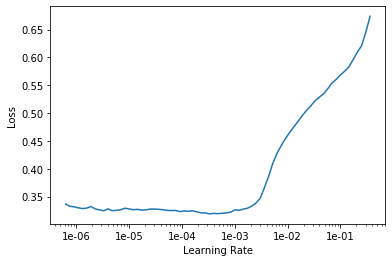

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit(100, slice(1.5e-4,1.5e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.386869,0.708647,0.598462,0.601730,00:04
1,0.407613,3.155415,0.522572,0.517956,00:04
2,0.499385,0.733433,0.543197,0.549894,00:04
3,0.509812,0.688308,0.572452,0.576136,00:04
4,0.484043,0.736359,0.579159,0.587297,00:04
5,0.468085,0.653816,0.595625,0.609244,00:04
6,0.441765,0.621395,0.607668,0.615999,00:04
7,0.426383,0.616627,0.613726,0.616335,00:04
8,0.405962,0.622327,0.619832,0.619758,00:04
9,0.389344,0.612924,0.628486,0.633983,00:04


Exception in thread Thread-220:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/pin_memory.py", line 25, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 294, in rebuild_storage_fd
    fd = df.detach()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/opt/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authke

KeyboardInterrupt: 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


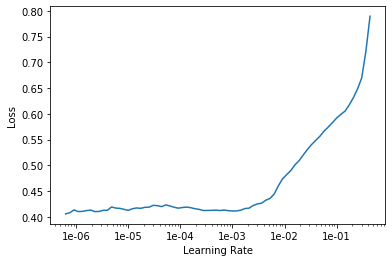

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit(10, slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.422183,0.726505,0.590481,0.577715,00:04
1,0.406761,0.624910,0.606538,0.602056,00:04
2,0.404803,0.630727,0.609111,0.600758,00:04
3,0.403698,0.629225,0.606034,0.602663,00:04
4,0.411348,0.646636,0.603750,0.605402,00:04
5,0.411427,0.629547,0.610793,0.602031,00:04
6,0.400434,0.644739,0.608486,0.590347,00:04
7,0.389899,0.617789,0.620120,0.623277,00:04
8,0.382698,0.622950,0.616346,0.611437,00:04
9,0.374428,0.650200,0.609471,0.605588,00:04


In [22]:
preds,y,losses = learn.get_preds(with_loss=True)

In [23]:
interp = ClassificationInterpretation(learn, preds,y,losses)

In [26]:
interp.most_confused()

[('0', '34', 3596),
 ('1', '34', 3572),
 ('0', '97', 1491),
 ('1', '97', 1453),
 ('1', '100', 970),
 ('0', '100', 950),
 ('1', '118', 725),
 ('0', '81', 720),
 ('1', '44', 709),
 ('1', '53', 707),
 ('0', '53', 701),
 ('0', '44', 699),
 ('1', '81', 688),
 ('0', '118', 683),
 ('0', '94', 643),
 ('1', '38', 642),
 ('0', '38', 638),
 ('1', '94', 637),
 ('1', '41', 609),
 ('1', '36', 596),
 ('0', '36', 556),
 ('0', '41', 543),
 ('1', '22', 532),
 ('1', '127', 516),
 ('0', '127', 508),
 ('0', '22', 492),
 ('1', '49', 472),
 ('1', '27', 464),
 ('0', '73', 452),
 ('1', '73', 444),
 ('0', '27', 432),
 ('0', '49', 424),
 ('0', '112', 396),
 ('0', '4', 396),
 ('1', '112', 372),
 ('1', '4', 372),
 ('1', '25', 326),
 ('0', '8', 323),
 ('1', '110', 323),
 ('0', '110', 317),
 ('1', '8', 317),
 ('0', '25', 314),
 ('1', '9', 272),
 ('0', '74', 265),
 ('1', '74', 247),
 ('0', '9', 240),
 ('0', '77', 205),
 ('1', '79', 205),
 ('1', '120', 198),
 ('1', '99', 196),
 ('0', '39', 195),
 ('1', '121', 195),
 (

In [10]:
learn.save('stage-1-rn50-full')

In [19]:
learn.load('stage-1-rn50-full')

Learner(data=ImageDataBunch;

Train: LabelList (31760 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
0;3;4;5;6;7;15;16;17;20;21;23;24;25;29;30;35;39;46;48;51;52;54;56;58;61;62;63;64;66;70;71;72;77;78;79;86;87;90;95;96;100;103;105;106;107;108;109;110;111;112;113;115;116;119;120;121;124;127;,0;3;4;5;6;7;15;16;17;20;21;23;24;25;29;30;35;39;46;48;51;52;54;56;58;61;62;63;64;66;70;71;72;77;78;79;86;87;90;95;96;100;103;105;106;107;108;109;110;111;112;113;115;116;119;120;121;124;127;,0;3;4;5;6;7;15;16;17;20;21;23;24;25;29;30;35;39;46;48;51;52;54;56;58;61;62;63;64;66;70;71;72;77;78;79;86;87;90;95;96;100;103;105;106;107;108;109;110;111;112;113;115;116;119;120;121;124;127;,0;3;4;5;6;7;15;16;17;20;21;23;24;25;29;30;35;39;46;48;51;52;54;56;58;61;62;63;64;66;70;71;72;77;78;79;86;87;90;95;96;100;103;105;106;107;108;109;110;111;112;113;115;116;119;120;121;124;127;,2;3;4;5;8;10;11;13;14;15;16;18;24;28;32;34;35

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


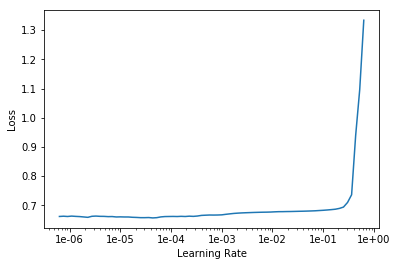

In [18]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(10, slice(1e-3, 1e-1))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.687921,1910.601929,0.510496,0.487789,04:20
1,0.714623,2852.550781,0.513720,0.483223,04:21
2,0.732046,9.317713,0.502729,0.550585,04:18
3,0.721517,43.000351,0.510224,0.485784,04:18
4,0.737015,15742.724609,0.509160,0.488772,04:16
5,0.711417,244565.281250,0.513322,0.533858,04:16
6,0.699845,0.691138,0.518182,0.545626,04:16
7,0.692229,0.688702,0.522726,0.501301,04:16
8,0.687883,0.686933,0.522699,0.507542,04:16
9,0.686465,0.686302,0.526132,0.479845,04:17


In [21]:
learn.save('stage-2-rn50-full')

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(8, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.616430,3.695228,0.553424,0.810407,00:15
1,0.630777,643.144897,0.549352,0.773123,00:15
2,0.630605,9.349798,0.571607,0.817772,00:15
3,0.622449,0.798929,0.565034,0.797846,00:15
4,0.606588,2.349970,0.594131,0.854588,00:15
5,0.592542,0.962049,0.590594,0.841731,00:15
6,0.577027,0.544122,0.599078,0.863626,00:15
7,0.561423,0.541461,0.599757,0.864056,00:15


In [35]:
learn.save('stage-2-rn50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


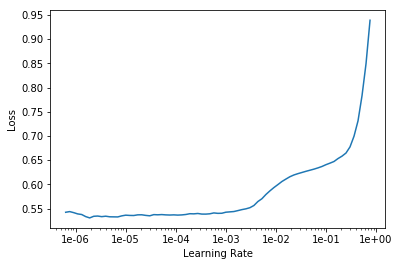

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, slice(1e-5, lr/8))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.534012,0.622980,0.592809,0.859184,00:15
1,0.554587,44.334713,0.559890,0.824478,00:15
2,0.557113,0.549233,0.602115,0.861035,00:15
3,0.544821,0.527115,0.606009,0.866521,00:15
4,0.534036,0.522120,0.608295,0.867783,00:15


In [38]:
learn.save('stage-3-rn50')

/home/onepanel/.conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


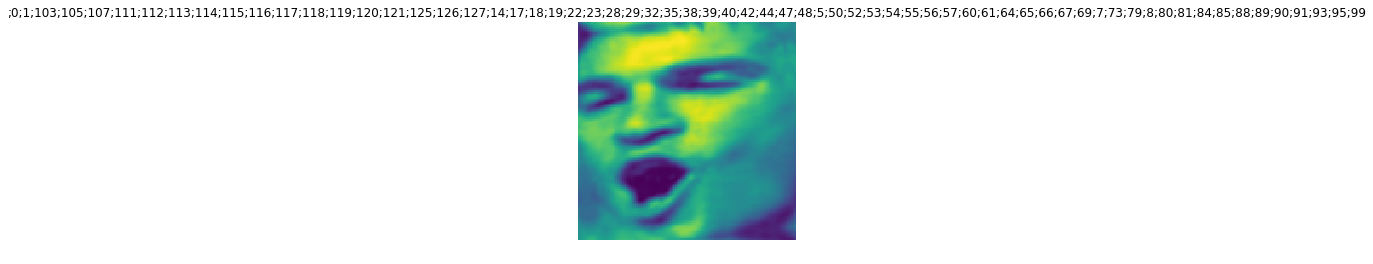

In [41]:
data.show_batch(rows=1)